## College Admissions Dataset
Exploratory analysis on college admissions to view the relations between the top10 and top20 percentages in the college admissions. Also completing a clustering on the college admissions. 

In [11]:
import numpy as np
import pandas as pd
from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
import sklearn
from sklearn.decomposition import PCA
from sklearn import preprocessing
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import sklearn.decomposition as dec
import statsmodels.api as sm 
import sklearn.cluster as clu
import sklearn.datasets as ds
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,fowlkes_mallows_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import sklearn.model_selection as ms
from sklearn.cluster import KMeans
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
College_df = pd.read_csv("../A/college.csv")

College_df.head(2)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56


In [4]:
private = pd.get_dummies(College_df["Private"], drop_first=True)
private["Yes"].value_counts()

1    565
0    212
Name: Yes, dtype: int64

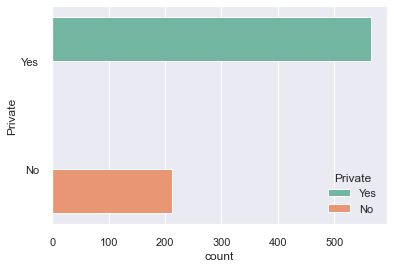

In [5]:
sns.set_theme(style="darkgrid")
sns.countplot(data=College_df, y='Private', hue="Private", palette="Set2");

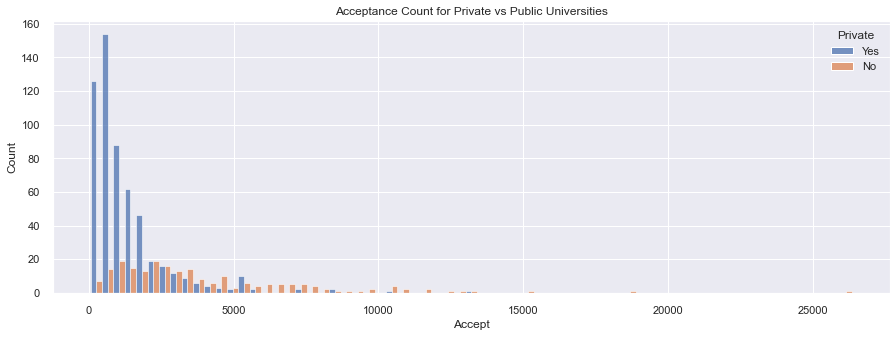

In [6]:
plt.figure(figsize=(15,5))
plt.title('Acceptance Count for Private vs Public Universities')
sns.histplot(data=College_df, x="Accept", hue="Private", multiple="dodge");

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
est = sm.OLS(College_df.Accept, sm.add_constant(pd.get_dummies(College_df.Private,drop_first=True))).fit(cov_type="HC2")
est.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Accept   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     113.2
Date:                Mon, 17 Jan 2022   Prob (F-statistic):           9.15e-25
Time:                        12:55:42   Log-Likelihood:                -7066.5
No. Observations:                 777   AIC:                         1.414e+04
Df Residuals:                     775   BIC:                         1.415e+04
Df Model:                           1                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3919.2877    238.820     16.411      0.000    3451.210    4387.366
Yes        -2613.5851    245.672    -10.639      0.000   -3095.093   -2132.077
==============================================================================
Omnibus:                      603.909   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15927.055
Skew:                           3.268   Prob(JB):                         0.00
Kurtosis:                      24.195   Cond. No.                         3.60
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

According to this analysis, private schools admit lesser students in comparison to all the other schools as the relationship between the variables above demonstrate. During this admission cycle, private schools admitted fewer than 2613 to every admission done in general.

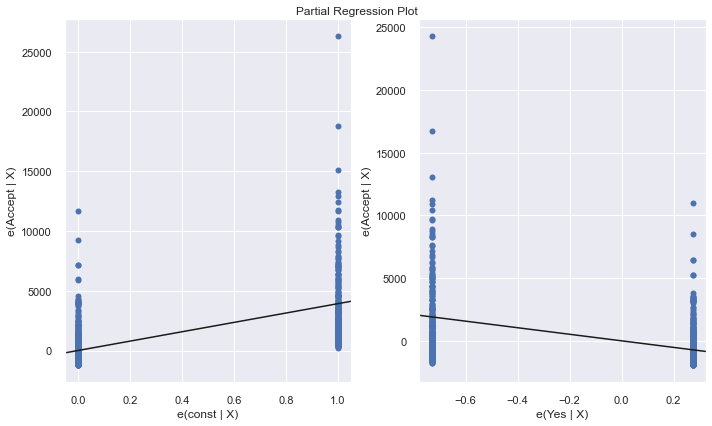

In [13]:
fig = plt.figure(figsize=(10,6))
fig = sm.graphics.plot_partregress_grid(est, fig=fig)

In [14]:
Top10 = College_df["Top10perc"].values
Top25 = College_df["Top25perc"].values
est = sm.OLS(Top25,sm.add_constant(Top10)).fit(cov_type="HC2")
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1557.
Date:                Mon, 17 Jan 2022   Prob (F-statistic):          1.42e-187
Time:                        12:55:46   Log-Likelihood:                -2805.2
No. Observations:                 777   AIC:                             5614.
Df Residuals:                     775   BIC:                             5624.
Df Model:                           1                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.1984      0.746     37.785      0.000      26.736      29.661
x1             1.0014      0.025     39.459      0.000       0.952       1.051
==============================================================================
Omnibus:                       45.943   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.462
Skew:                           0.401   Prob(JB):                     2.77e-19
Kurtosis:                       4.413   Cond. No.                         60.8
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

In [15]:
Top10_sq = np.square(Top10)
Top10new = np.concatenate((Top10, np.square(Top10)))
est = sm.OLS(Top25,sm.add_constant(Top10_sq)).fit(cov_type="HC2")
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     366.6
Date:                Mon, 17 Jan 2022   Prob (F-statistic):           3.33e-67
Time:                        12:55:48   Log-Likelihood:                -3066.3
No. Observations:                 777   AIC:                             6137.
Df Residuals:                     775   BIC:                             6146.
Df Model:                           1                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.7369      0.653     68.557      0.000      43.458      46.016
x1             0.0103      0.001     19.146      0.000       0.009       0.011
==============================================================================
Omnibus:                       12.736   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.884
Skew:                          -0.304   Prob(JB):                      0.00159
Kurtosis:                       3.168   Cond. No.                     2.26e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 2.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

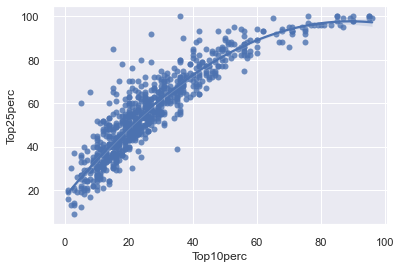

In [16]:
sns.regplot(x=College_df["Top10perc"], y=College_df["Top25perc"], order=2);

In [20]:
college = College_df.copy()
college = college.rename(columns={"Unnamed: 0": "Index"})
college = college.set_index("Index")
college["Private"] = college["Private"].map({"Yes": 1, "No": 0})
y = college.Private
college.drop(["Private"], axis=1, inplace=True)
kmeans = KMeans(n_clusters=2)
scaler = RobustScaler()
college_pr = scaler.fit_transform(college)
college_nm = pd.DataFrame(college_pr, index=college.index, columns=college.columns)
kmeans.fit_transform(college_nm)
print(f'KMeans Cluster Centers are: \n {kmeans.cluster_centers_}')
print(f'\n The Confusion Matrix: \n {confusion_matrix(y, kmeans.labels_)}')
print(f'\n The Classification report: \n{classification_report(y, kmeans.labels_)}')

KMeans Cluster Centers are: 
 [[ 0.15547351  0.1235473   0.09108263  0.19434655  0.02344242  0.15482493
   0.1951461   0.13086674  0.12487405  0.33092737  0.07786991 -0.17052927
  -0.1749528   0.03955947  0.15247186  0.3146502   0.04904552]
 [ 2.99979518  3.16514423  3.59663826  0.46614583  0.3530506   4.25521006
   3.27792909 -0.2775591  -0.0083448   0.72692308  0.78681373  0.38632246
   0.35565476  0.51208333 -0.2974537   0.31408076 -0.19791667]]

 The Confusion Matrix: 
 [[128  84]
 [553  12]]

 The Classification report: 
              precision    recall  f1-score   support

           0       0.19      0.60      0.29       212
           1       0.12      0.02      0.04       565

    accuracy                           0.18       777
   macro avg       0.16      0.31      0.16       777
weighted avg       0.14      0.18      0.10       777



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


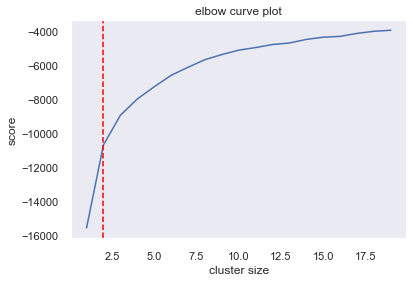

In [21]:
c_size = range(1,20)
kmeans = [KMeans(n_clusters=i) for i in c_size]
score = [kmeans[i].fit(college_nm).score(college_nm) for i in range(len(kmeans))]    

plt.plot(c_size, score)
plt.axvline(x=2.0, linestyle="--", c="red")
plt.xlabel("cluster size")
plt.ylabel("score")
plt.title("elbow curve plot")
plt.grid()
plt.show();

----------------------------------------------------------------------------------------------------
The number of clusters: 2
The silhouette score: 0.4964618230845501
----------------------------------------------------------------------------------------------------
The number of clusters: 3
The silhouette score: 0.27473857047150696
----------------------------------------------------------------------------------------------------
The number of clusters: 4
The silhouette score: 0.2800192091360085
----------------------------------------------------------------------------------------------------
The number of clusters: 5
The silhouette score: 0.28390798600885175
----------------------------------------------------------------------------------------------------
The number of clusters: 6
The silhouette score: 0.18660443955310915
----------------------------------------------------------------------------------------------------
The number of clusters: 7
The silhouette score: 0.211116

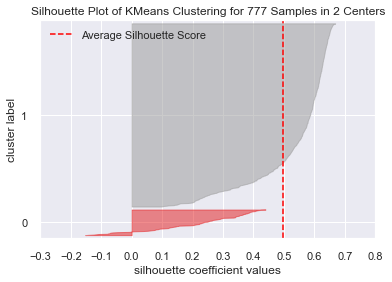

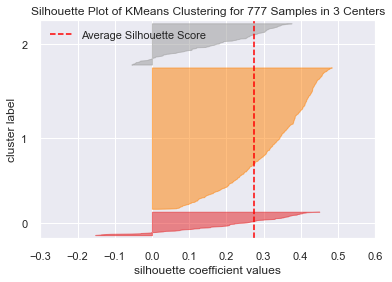

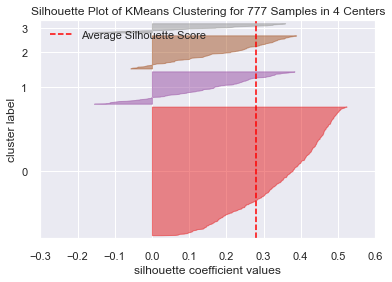

In [22]:
scaler = RobustScaler()
college_pr_ = scaler.fit_transform(college_pr)
results = {}
cluster_num = 10
for k in range(2, cluster_num):
    print("-"*100)
    results[k] = {}
    kmeans = KMeans(n_clusters= k, random_state=0).fit(college_pr_)
    
    #silhouette score:
    sil_score = metrics.silhouette_score(college_pr, kmeans.labels_, metric = "euclidean")
    results[k]["silhouette score"] = sil_score
    results[k]["kmeans score"] = kmeans.score
    results[k]["kmeans inertia"] = kmeans.inertia_
    results[k]["kmeans model"] = kmeans
    
    print(f"The number of clusters: {k}")
    print(f"The silhouette score: {sil_score}")


clusters = [2,3,4]
for c in clusters:
    kmeans = KMeans(n_clusters= c, random_state=0)
    sil_viz = SilhouetteVisualizer(kmeans)
    
    sil_viz.fit(college_pr_)
    sil_viz.poof()

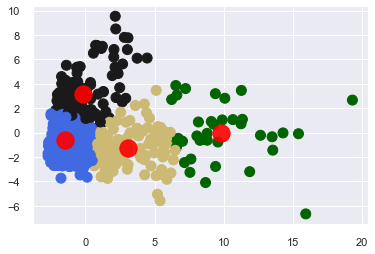

In [23]:
pca = PCA(n_components=2)
college_pca = pca.fit_transform(college_pr_)
college_pd = pd.DataFrame(college_pca)
k_means = KMeans(n_clusters=4)
college_cluster = k_means.fit_predict(college_pd)
label_color_map = {0: "k", 1: "y", 2: "royalblue", 3: "darkgreen"}
color_map = [label_color_map[i] for i in college_cluster]
plt.figure(figsize=(6,4))
plt.scatter(college_pca[:, 0], college_pca[:, 1], c=color_map, s=100)

clusterCenters = k_means.cluster_centers_
plt.scatter(clusterCenters[:, 0], clusterCenters[:, 1], c='red', s=300, alpha=0.9);